# Housing Price Competition Notebook

Seeing how well I can create a portfolio project

# Initial Prep: Read Libraries and Files

## Reading in libraries
This block is default copy to bring in numpy and pandas and also look at the available files. I'll be bringing those files in one at a time later on.


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import os

# Input data files are available in the read-only "../input/" directory for kaggle, so we'll take a look at the files I'm using for this project

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Kaggle also has the following notes for storing data:
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

%matplotlib inline
pd.set_option('display.max_columns', None) #Show all columns when examining data

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## Reading in Files

In [2]:
sample_submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
sample_submission.head(10)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
5,1466,177150.989247
6,1467,172070.659229
7,1468,175110.956520
8,1469,162011.698832
9,1470,160726.247831


In [3]:
data_description = open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt')

In [4]:
data_description.seek(0)
#data_description.readlines()

0

In [5]:
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

test.head(5)
#Note that test has same number of rows as sample_sumbission, and the IDs match

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#Baseline understanding
I'm going to do basically nothing and throw this into an xgboost or random forest to see the kinds of scores we are getting with no feature cleaning/feature creation. 
We can then compare different versions of the model to see if we are actually improving performance.

# Understanding The Data
Lets start with an understanding of SalePrice, because that's gonna be our independent.

In [7]:
train.describe(include = 'all') #'all' allows us to bring in categorical variables in addition to numeric

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,588,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,3,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,445,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,N

In [8]:
train.shape

(1460, 81)

First impressions of the data:
1) There are only 1460 entries. That may limit the kinds of models I use because that isn't a lot of data when we're looking at interferrence between 81 variables. Most variables have full data. (18/81 are missing data).

2) MSSubClass is categorical but is getting picked up as numeric. Want to ensure that is encoded properly.
## Todo cast the categorical columns into Pandas category

2) Some variables (ex: LotFrontage, MasVnrArea) are missing data. Will need to have models that are robust to missing data or find some way to fill.

3) I'm seeing some categorical variables that have an ordinal relationship between the categories (ex: Lot Shape has Regular, Slightly Irregular, Moderately Irregular, and Irregular). Want to try to capture that.

4) Seeing some Variables that are paired, like Condition1 and Condition2


In [9]:
print(train.SalePrice.describe())


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


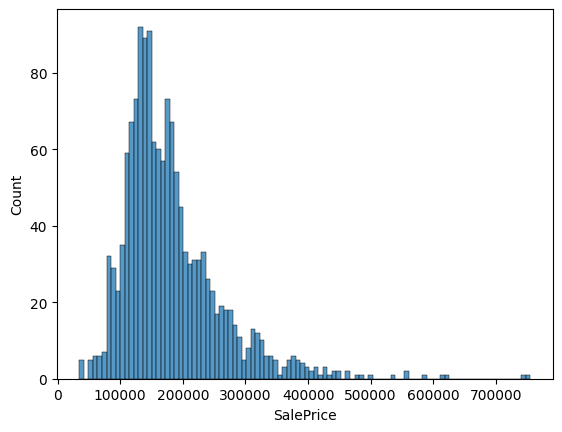

In [10]:
#plt.hist(train.SalePrice)
#plt.figure(figsize = (9, 8)) #Blow up size of graph
#We want to do a histogram with more detail, so lets mess with some settings
finalplot = sns.histplot(train.SalePrice, bins = 100)
#Definitely left skew. Lets try it with log?
#sns.histplot(np.log(train["SalePrice"]), bins = 100)
#Looks much more centered, better to make linear predictions with.

#Getting a note that there are inf values, 

In [11]:
#Doing some roughCribbing from the cheat sheet to look at distributions for all numeric features:
#Look at types for all features
list(set(train.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [12]:
#Looks like we have three different types, float, int, and O (not sure what O is)
df_num = train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


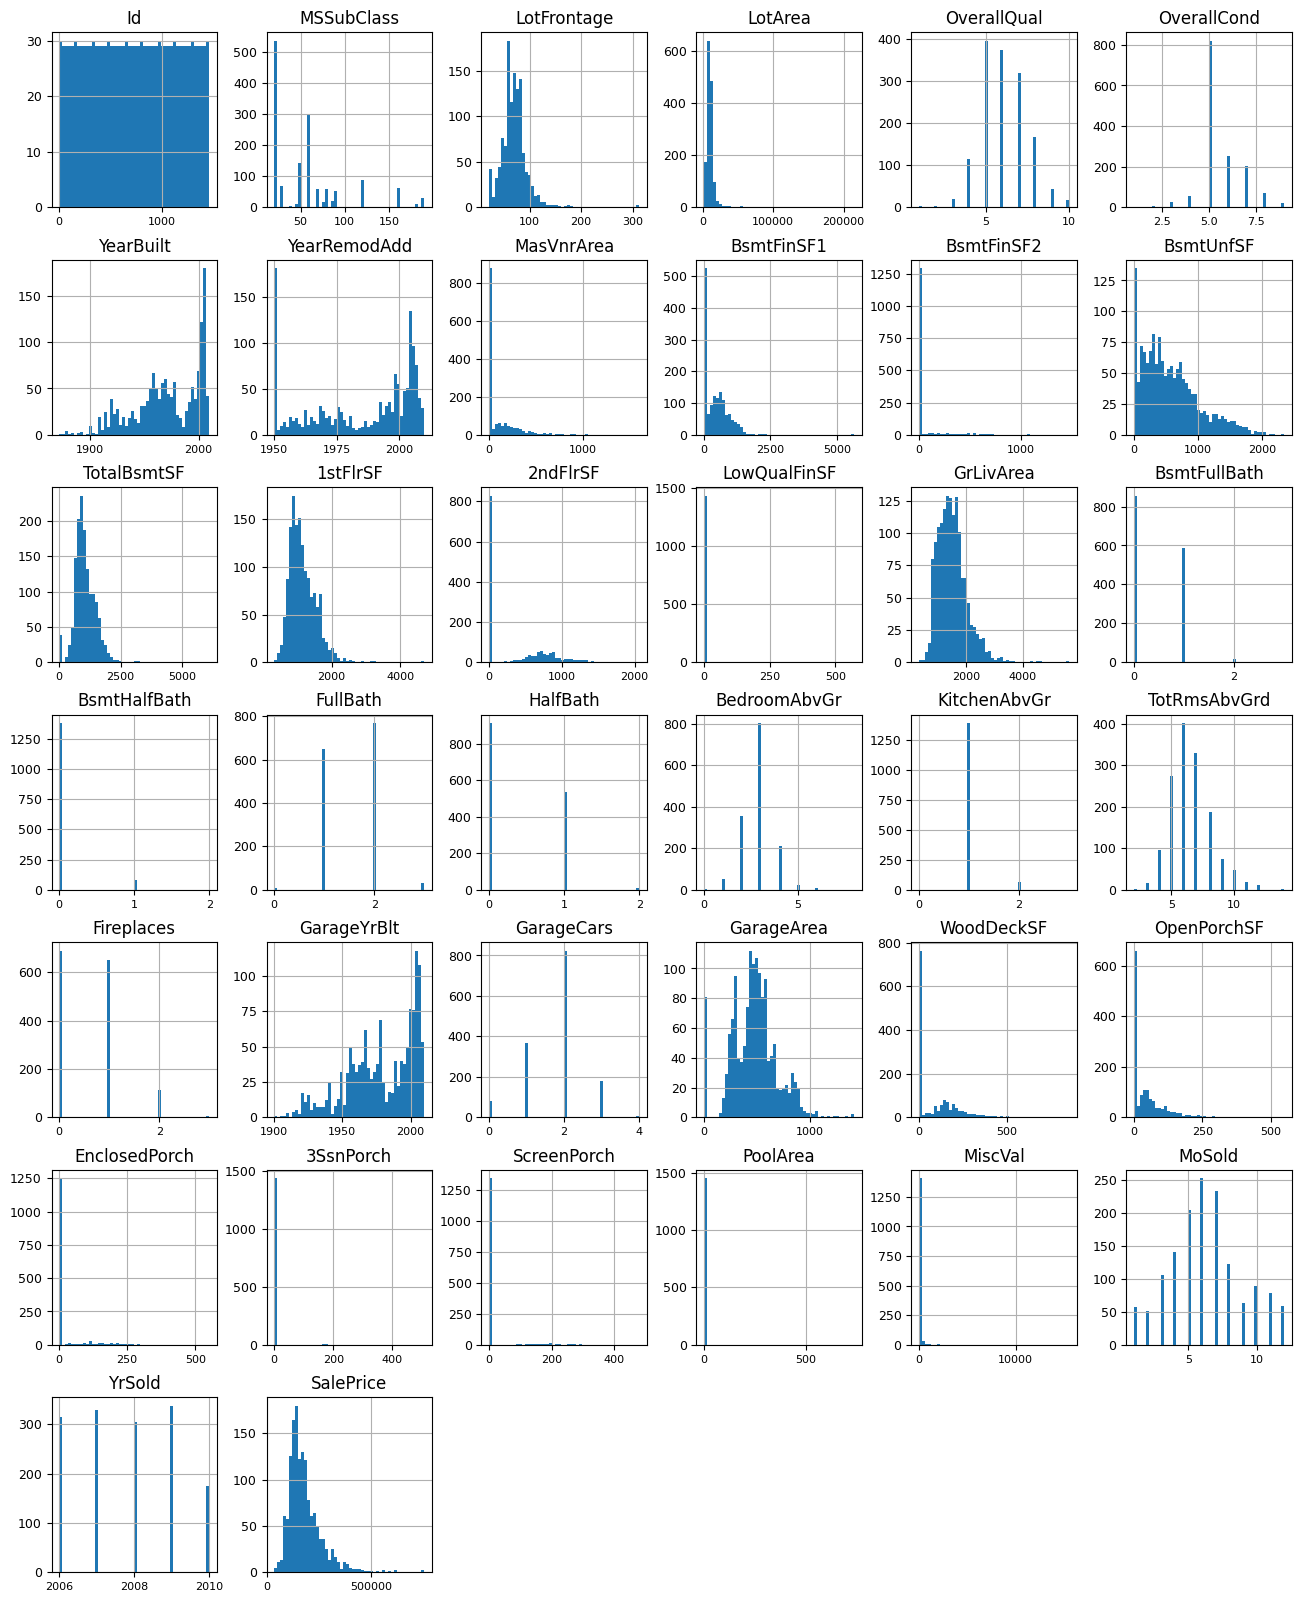

In [13]:
df_num.hist(figsize = (16, 20), bins = 50, xlabelsize = 8, ylabelsize = 9);
#Wow, semi-colon is super important here. Changes the code from outputing a stringified list of objects to outputting a series of charts
#As for the Charts:
#ID is super boring
#MS SubClass looks like there are a lot of specific values, also this is overall left skewed, maybe categorical?
#Lot Frontage is hugely left skewed, should be log
#Lot Area is hugely left skewed, should be log
#Overall Qual and Overal Cond both seem more categorical as they only go 1-10 basically.
#Lots of these variables have huge 0 spikes, probably representing missing data. Might want to have a way to categorize that more clearly. 
#At least for SLR maybe we drop these (YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF)


Looks like a lot of variables are right skewed, was going to mess around with SLR, but I'm pretty sure these are all correlated so SLR will get messed up from all the interference. 

I'm worried that a lot of these variables with good data will end up too correlated to make good data in SLR.

Running a correlation matrix to confirm

In [14]:
corr = df_num.corr()
#Picking a colormap where the center is white
corr.style.background_gradient(cmap = 'RdBu', vmin = -1, vmax = 1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [15]:
#df_num.YearBuilt.describe()
#df_num.loc[df_num['YearBuilt'] > df_num['GarageYrBlt'], ['Id', 'YearBuilt', 'GarageYrBlt']].head(20)
#df_num[df_num['GarageYrBlt'] == 0]
df_num.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

Consensus is that a lot of obvious pairs are highly correlated (GarageCars and GarageArea) (YearBuilt and GarageYrBlt)

This last pair is giving me worries about the effect of missing data on some of these other correlations. YearBuilt always has a non-zero value (ranges from 1872 to 2010), but GarageYrBlt has to be after YearBuilt (looking at the data shows ~7 exceptions) so just linear doesn't seem like a good way to describe these variables that seem to impact each other

For another example, I would expect a similar correlation between YearBuilt and YearRemodAdd. Garages are usually built at the same time the rest of the house is, and the remodel is usually after that point, but this correlation may be getting thrown off by the number of houses that are not remodled and are instead marked as the same year. Here's a look at the correlation between those two variables with 1950 and with 1950 replaced by None

### New Info
Reading through the variable descriptions, here are the descriptions for each of the variables previously mentioned:

-YearBuilt: Original construction date

-YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

NA for YearRemodAdd is not being filled with 1950, it is getting filled with Year Built. So why are there so many YearRemodAdd at 1950? is that the lower limit for houses built before 1950?

In [16]:
YearRemodAddRm = pd.DataFrame(df_num[['YearBuilt', 'YearRemodAdd']])
YearRemodAddRm['YearRemodAddRm'] = np.where(YearRemodAddRm['YearRemodAdd'] == 1950, None, YearRemodAddRm['YearRemodAdd'])
YearRemodAddRm.corr()

,YearBuilt,YearRemodAdd,YearRemodAddRm
YearBuilt,1.000000,0.592855,0.417087
YearRemodAdd,0.592855,1.000000,1.000000
YearRemodAddRm,0.417087,1.000000,1.000000


Huh, the correlation goes down when we have missing data. That's strange. I thought the relationship would have been more clear now.

# Exploring Specific Variables

## Location and Neighborhood
I was surprised that I didn't see any lat/long info. In general, it doesn't look like there is a lot of location based info that would be good for something like geolocation. I'm leaning towards geolocation because stratifying by neighborhoods can be a bit binary, and I'd prefer to spread these out, but let's take a look.

Here are the columns that look like they involve some geo info:

-Neighborhood:

That's it. Clearly the neighborhoods are going to be important for pricing, and some neighborhoods will be more desirable than others, but we have nothing else that can influence price. Like no measure of how nice the house next door is, or any kind of geo that is more detailed.

So let's take a look at neighborhood:

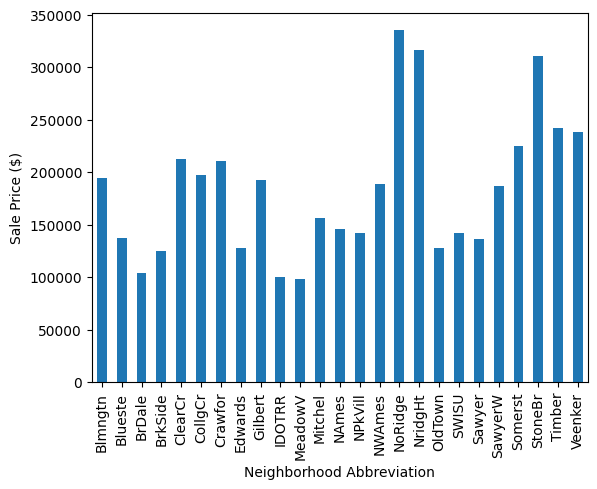

In [17]:
bargraph = train.groupby(by = "Neighborhood")["SalePrice"].mean().plot.bar(xlabel = "Neighborhood Abbreviation", ylabel = "Sale Price ($)")

Looks like expensive neighborhoods are going to be ones like NWAmes (Northwest Ames), NoRidge (Northridge) and StoneBr (Stone Brook) while cheap neighborhoods will be ones like MeadowV (Meadow Village), IDOTRR (Iowa DOT and Rail Road), and BrDale (Briardale).

I'd like to put all these neighborhoods on a map, just for my own ease of understanding, but I don't know how to find a map like that.
## Todo: Find Neighborhood Map

## Paired Variables: Condition 1 and Condition 2
There are a couple of variables that come in pairs like this:

-Condition1 and Condition2

-Exterior1st and Exterior2nd

-BsmtFinType1 and BsmtFinType2

-BsmtFinSF1 and BsmtFinSF2

We can use Condition1 and Condition2 to examine how these paired variables relate to each other and if there's any special way that we need to handle them.

The description for Condition1 is: 

<code> Condition1: Proximity to various conditions
       Artery - Adjacent to arterial street
       Feedr - Adjacent to feeder street
       Norm - Normal
       RRNn - Within 200' of North-South Railroad
       RRAn - Adjacent to North-South Railroad
       PosN - Near positive off-site feature--park, greenbelt, etc.
       PosA - Adjacent to postive off-site feature
       RRNe - Within 200' of East-West Railroad
       RRAe - Adjacent to East-West Railroad </code>

The description for Condition2 gives the same options but has this description instead:

<code> Proximity to various conditions (if more than one is present) </code>

So what do their distributions look like?


In [18]:
crosstab = pd.crosstab(train['Condition1'], train['Condition2'])
print(crosstab)

Condition2  Artery  Feedr  Norm  PosA  PosN  RRAe  RRAn  RRNn
Condition1                                                   
Artery           2      0    45     1     0     0     0     0
Feedr            0      1    76     0     0     1     1     2
Norm             0      0  1260     0     0     0     0     0
PosA             0      0     8     0     0     0     0     0
PosN             0      0    17     0     2     0     0     0
RRAe             0      0    11     0     0     0     0     0
RRAn             0      4    22     0     0     0     0     0
RRNe             0      0     2     0     0     0     0     0
RRNn             0      1     4     0     0     0     0     0


This is interesting. Most of the data is at the cross-section of Normal and Normal, but there are a few cases where Condition1 has a value and Condition 2 is normal. That would look as we expect it if Normal is the default value, and Condition1 is filled before Condition2 in the case a property meets one of the possible conditions.

The surprising find is that (for example) Condition1 and Condition2 can both be Artery. Assuming this isn't a data issue, does this imply that this property is on the corner connecting two different arteries?

Also, what gives one Condition priority over the other? In the case that a property has two conditions, what pushes one to be Condition1 over the other? From the looks of it, there are two properties that have Condition1 = Feedr and Condition2 = RRNn and one Property where Condition1 = RRNn and Condition2 = Feedr

In [19]:
temp_df = train[((train.Condition1 == "Feedr") & (train.Condition2 == "RRNn")) | ((train.Condition1 == "RRNn") & (train.Condition2 == "Feedr"))]
temp_df[["Id", "Condition1", "Condition2"]]

,Id,Condition1,Condition2
29,30,Feedr,RRNn
531,532,RRNn,Feedr
548,549,Feedr,RRNn


The question is, should there be any difference in the way that we handle these three rows? Maybe its better to flip this variable into muliple columns like binary dummies. Binary dummies can't handle a row that has two artery conditions, so maybe that can be 2?

## Todo: Examine what these dummies would look like. Also look at BsmtFinType1 and BsmtFinType2 and BsmtFinSF1 and BsmtFinSF2

## Time

These are all of the variables that have some kind of time component:

-YearBuilt: I expect that generally, newer houses will be more expensive than older houses however, this probably has a huge interaction with the kinds of materials we would expect to see in the house

-YearRemodAdd: In addition to the points I've looked into above, a more recent remodelling should be a higher sales price

-MoSold: This probably has a cyclical effect after adjusting for year. 

-YrSold: This is by far the most complicated effect. I'm sure that over time, different neighborhoods have become more and less desirable, so there's going to be interaction there. I'm sure that the requirement for gas/electricity has changed in value over time. I'm sure that this impacts materials. I'm worried that there are so many interaction terms that we need to keep track of.



# Prepping the Dataset for Modeling
Let's start with a simple model. We have a combination of categorical and numerical data, lots of interplay between the variables, and we want something readable (for this first attempt) to see if there are any additional relationships or additional variables that we want to incorporate.

All of that together sounds like a tree model. We want to predict a numerical variable, so lets work with a regression tree. Let's start pulling together a dataset for that.

In [20]:
dependent_var = ["SalePrice"]
independent_vars = [col for col in train.columns if col not in ['Id', 'SalePrice']]

train_ind = train[independent_vars]
train_dep = train[dependent_var]

test_ind = test[independent_vars]

In [21]:
#Running a few of the corrections I saw.
#MSSubClass
train_ind["MSSubClass"].apply(str)
test_ind["MSSubClass"].apply(str)

0        20
1        20
2        60
3        60
4       120
       ... 
1454    160
1455    160
1456     20
1457     85
1458     60
Name: MSSubClass, Length: 1459, dtype: object

Let's try modeling and see where we get

In [22]:
#Not happening because there is categorical data.
#decision_tree = DecisionTreeRegressor()
#decision_tree.fit(train_ind, train_dep)
#train_pred = decision_tree.predict(test_ind)